In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. Simple CNN models

In this notebook, we'll deploy and analyze the results of simple CNNs on our training, validation & testing data.

In [3]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from utils import split_data, image_generators

In [4]:
# Connect to GDrive files
drive = "drive/MyDrive"

# Save directory paths
train_dir = os.path.join(drive, "train")
val_dir = os.path.join(drive, "validation")
g_train_dir = os.path.join(train_dir, "glaucoma")
g_val_dir = os.path.join(val_dir, "glaucoma")
n_train_dir = os.path.join(train_dir, "normal")
n_val_dir = os.path.join(val_dir, "normal")

### 3.1 Define & choose network architecture

We'll create, visualize, and evaluate 3 different CNN architectures:
* 1 x convolutional, 1 x pooling, 1 x dense layers
- 2 x convolutional, 2 x pooling, 1 x dense layers
* 3 x convolutional, 3 x pooling, 1 x dense layers

We want to find the optimal number of convolutions for increasing the accuracy of our predictions without losing information from the dataset. We will also test how our performance is affected when we remove any of the pooling layers in the next section.

First off, we'll define the image size for the training and validation data as (178, 178), as it's the smallest resolution from the whole dataset. Secondly, we'll do a 80-20 train-validation split.

In [ ]:
# For running on local machine
# split_size = 0.8
#
# Save directory paths
# acrima_dir = os.path.join(os.getcwd(), "data/acrima-dataset")
# glaucoma_dir = os.path.join(acrima_dir, "glaucoma")
# normal_dir = os.path.join(acrima_dir, "normal")
# train_dir = os.path.join(acrima_dir, "train")
# val_dir = os.path.join(acrima_dir, "validation")
# g_train_dir = os.path.join(train_dir, "glaucoma")
# g_val_dir = os.path.join(val_dir, "glaucoma")
# n_train_dir = os.path.join(train_dir, "normal")
# n_val_dir = os.path.join(val_dir, "normal")
# 
# Train-validation split data
# split_data(glaucoma_dir, g_train_dir, g_val_dir, split_size)
# split_data(normal_dir, n_train_dir, n_val_dir, split_size)

In [5]:
# Define input datasets arguments
train_image_size = (178, 178)
val_image_size = (178, 178)

# Get image generators for training & validation data
train_gen, val_gen = image_generators(train_dir, val_dir, train_image_size, val_image_size)

Found 563 images belonging to 2 classes.
Found 142 images belonging to 2 classes.


We'll check to see how well each of the models is performing after only 5 epochs to then choose a model to refine. We chose:
* **ReLu activation** functions for the convolutions
- **Sigmoid activation** function for the output layer, as it's a binary classification problem
* **RMSprop optimizer**, as it applies gradient descent and automatically chooses a learning rate
- **Binary crossentropy loss**, as we're working on a binary classification problem

In [6]:
input_shape = (178, 178, 3)

In [11]:
# Define function to visualize results to determine if model is overfitting
def visualize_results(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc)) 
  ax, fig = plt.subplots(figsize=(20, 4))
  plt.subplot(121)
  plt.plot(epochs, acc, 'r', "Training Accuracy")
  plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
  plt.title('Training and validation accuracy')
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  plt.subplot(122)
  plt.plot(epochs, loss, 'r', "Training Loss")
  plt.plot(epochs, val_loss, 'b', "Validation Loss")
  plt.show()

#### 3.1.1. One layer model

In [ ]:
one_layer_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=input_shape, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

one_layer_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),\
    loss='binary_crossentropy', metrics=['accuracy'])

history = one_layer_model.fit(train_gen,
                    epochs=5,
                    verbose=1,
                    validation_data=val_gen)

Epoch 1/5
29/29 [==============================] - 99s 3s/step - loss: 22.9461 - accuracy: 0.6199 - val_loss: 0.5475 - val_accuracy: 0.8310
Epoch 2/5
29/29 [==============================] - 96s 3s/step - loss: 1.0916 - accuracy: 0.7886 - val_loss: 0.2978 - val_accuracy: 0.8803
Epoch 3/5
29/29 [==============================] - 97s 3s/step - loss: 0.4454 - accuracy: 0.8668 - val_loss: 0.3139 - val_accuracy: 0.8592
Epoch 4/5
29/29 [==============================] - 94s 3s/step - loss: 0.3863 - accuracy: 0.8757 - val_loss: 0.1941 - val_accuracy: 0.9225
Epoch 5/5
29/29 [==============================] - 104s 4s/step - loss: 0.3972 - accuracy: 0.9059 - val_loss: 2.9187 - val_accuracy: 0.6338


**One-layer stats:** After 5 epochs, we get a training accuracy of 90.6% and a validation accuracy of 63.4%.

It seems that after the 5th epoch, the model begins to significantly overfit. Also, given the deep neural network has many more neurons compared to the other two networks, the training time is significantly higher.

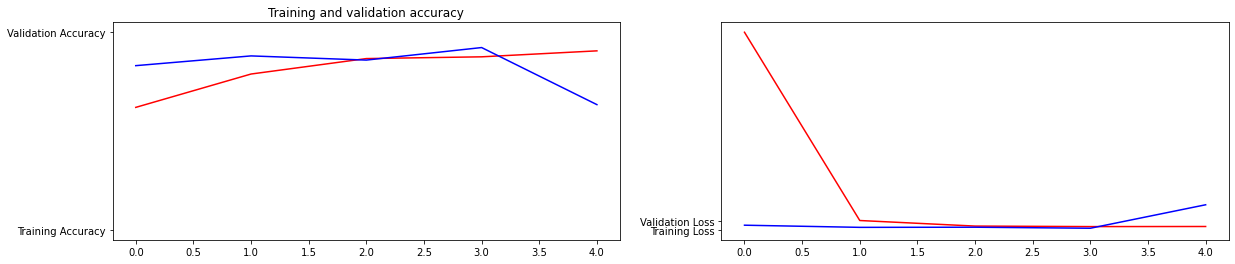

In [ ]:
visualize_results(history)

#### 3.1.2. Two-layer model

In [ ]:
two_layer_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

two_layer_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),\
    loss='binary_crossentropy', metrics=['accuracy'])

history = two_layer_model.fit(train_gen,
                    epochs=5,
                    verbose=1,
                    validation_data=val_gen)

Epoch 1/5
29/29 [==============================] - 46s 2s/step - loss: 4.1079 - accuracy: 0.6892 - val_loss: 0.4048 - val_accuracy: 0.8592
Epoch 2/5
29/29 [==============================] - 46s 2s/step - loss: 0.6476 - accuracy: 0.8188 - val_loss: 0.2900 - val_accuracy: 0.8803
Epoch 3/5
29/29 [==============================] - 47s 2s/step - loss: 0.3650 - accuracy: 0.8845 - val_loss: 0.2005 - val_accuracy: 0.9085
Epoch 4/5
29/29 [==============================] - 45s 2s/step - loss: 0.4087 - accuracy: 0.8650 - val_loss: 0.7124 - val_accuracy: 0.6972
Epoch 5/5
29/29 [==============================] - 45s 2s/step - loss: 0.2192 - accuracy: 0.9290 - val_loss: 0.2988 - val_accuracy: 0.9085


**Two-layer stats:** After 5 epochs, we get a training accuracy of 92.9% and a validation accuracy of 90.9%.

The two-layer model provides better results after 5 epochs compared to the one-layer model.

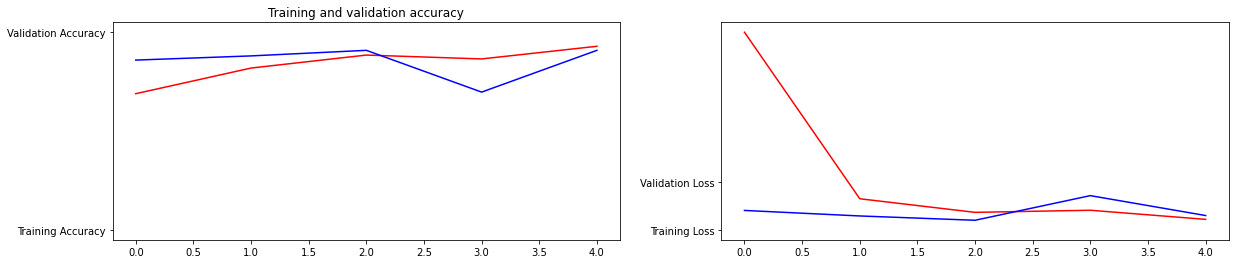

In [ ]:
visualize_results(history)

#### 3.1.3. Three-layer model

In [ ]:
three_layer_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), input_shape=input_shape, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

three_layer_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),\
    loss='binary_crossentropy', metrics=['accuracy'])

history = three_layer_model.fit(train_gen,
                    epochs=5,
                    verbose=1,
                    validation_data=val_gen)

Epoch 1/5
29/29 [==============================] - 27s 881ms/step - loss: 1.1086 - accuracy: 0.6643 - val_loss: 0.5446 - val_accuracy: 0.6197
Epoch 2/5
29/29 [==============================] - 26s 887ms/step - loss: 0.4544 - accuracy: 0.8206 - val_loss: 0.3995 - val_accuracy: 0.8521
Epoch 3/5
29/29 [==============================] - 24s 822ms/step - loss: 0.3455 - accuracy: 0.8703 - val_loss: 0.3559 - val_accuracy: 0.8380
Epoch 4/5
29/29 [==============================] - 24s 818ms/step - loss: 0.4280 - accuracy: 0.8703 - val_loss: 0.2489 - val_accuracy: 0.8873
Epoch 5/5
29/29 [==============================] - 24s 835ms/step - loss: 0.3080 - accuracy: 0.8863 - val_loss: 0.2899 - val_accuracy: 0.8732


**Three-layer stats:** After 5 epochs, we get a training accuracy of 88.6% and a validation accuracy of 87.3%. 

The accuracy is lower than in the case of the two-layer network, suggesting that adding an additional convolution removes relevant data from the neural network. However, in this case the training & validation accuracy seem to converge.

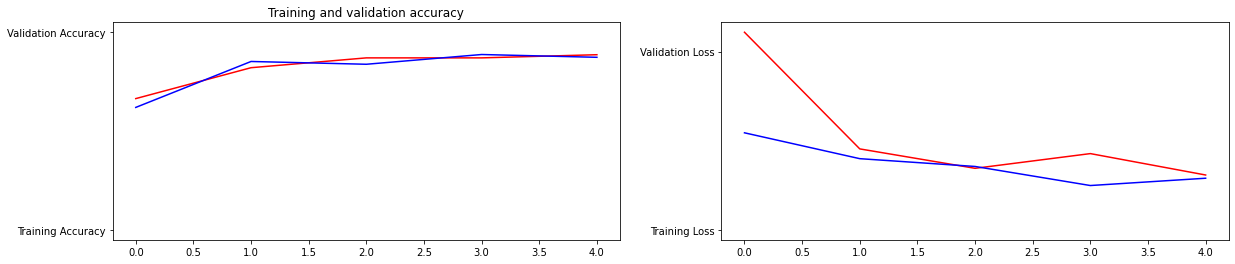

In [ ]:
visualize_results(history)

### 3.2. Hyperparameter tuning

We'll now try to optimize our two-layer neural network which we'll then test on the Kaggle dataset.

In [9]:
# Create function to personalize hyperparameters for the chosen architecture
def create_model(filter_1=32, filter_2=64, kernel=(3, 3), activation_conv='relu', neurons=512, activation_dense='relu', \
                 optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss="binary_crossentropy", epochs=5):
  two_layer_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filter_1, kernel, input_shape=(178, 178, 3), activation=activation_conv),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(filter_2, kernel, activation=activation_conv),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(neurons, activation=activation_dense),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

  two_layer_model.compile(optimizer=optimizer,loss=loss, metrics=['accuracy'])

  history = two_layer_model.fit(train_gen,
                      epochs=epochs,
                      verbose=1,
                      validation_data=val_gen)
  
  return history

#### 3.2.0. Hyperparameter tuning with GridSearchCV (discarded because of runtime issues)

In [ ]:
import numpy as np
from tqdm import tqdm
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_model():
  two_layer_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

  two_layer_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),\
    loss='binary_crossentropy', metrics=['accuracy'])
  
  return two_layer_model

To use GridSearchCV with our image generators we need to unwrap the augmented images from the generators. To do so, I explored the `train_gen` `keras.preprocessing.image.DirectoryIterator` object.

In [ ]:
print("train_gen type:", type(train_gen))
print("train_gen[0] type", type(train_gen[0]))
print("train_gen[0][0] type", type(train_gen[0][0]))
print("train_gen[0][0][0] type", type(train_gen[0][0][0]))

train_gen type: <class 'keras.preprocessing.image.DirectoryIterator'>
train_gen[0] type <class 'tuple'>
train_gen[0][0] type <class 'numpy.ndarray'>
train_gen[0][0][0] type <class 'numpy.ndarray'>


In [ ]:
print("train_gen length:", len(train_gen))
print("train_gen[0] length", len(train_gen[0]))
print("train_gen[0][0] shape", train_gen[0][0].shape)
print("train_gen[0][0][0] shape", train_gen[0][0][0].shape)

train_gen length: 29
train_gen[0] length 2
train_gen[0][0] shape (20, 178, 178, 3)
train_gen[0][0][0] shape (178, 178, 3)


We notice that each element in the `train_gen`corresponds to an image batch. Then, the elements in the `train_gen[x]` tuples contain each image and label within the batch. Therefore, we need to iterate through each sample to get the input augmented images and their label for `GridSearchCV`.

In [ ]:
def extract_images(generator, classes={0: "0", 1:"1"}):

  no_of_batches = len(generator)
  no_of_classes = len(classes)
  batch_size = generator[0][0].shape[0]
  no_of_examples = no_of_batches * no_of_classes * batch_size

  X = []
  y = []

  for no_batch, batch in tqdm(enumerate(generator)):

    # Ensure iteration doesn't run indefinitely, it's a keras issue
    if no_batch > (no_of_batches - 1):
      break

    for (image, label) in zip(batch[0], batch[1]):
      X.append(image)
      y.append(classes[label])

  return X, y

In [ ]:
# Figure out which class is 0 and which is 1
train_gen.class_indices

{'glaucoma': 0, 'normal': 1}

In [ ]:
classes = {0: "glaucoma", 1: "normal"}

X_train, y_train = extract_images(train_gen, classes)
X_val, y_val = extract_images(val_gen, classes)

29it [00:04,  6.30it/s]
8it [00:01,  6.17it/s]


In [ ]:
# Group all training data together
X = X_train + X_val
y = y_train + y_val

# Ensure we have the correct format and number of samples
print(len(X))
print(X[0].shape)
print(len(y))
print(y[0])

705
(178, 178, 3)
705
glaucoma


In [ ]:
# Choose a random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# Define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 20, 30, 40, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=create_model(), param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


#### 3.2.1. Filter sizes

Epoch 1/5
29/29 [==============================] - 274s 9s/step - loss: 3.3595 - accuracy: 0.6004 - val_loss: 0.5580 - val_accuracy: 0.6620
Epoch 2/5
29/29 [==============================] - 29s 987ms/step - loss: 0.4461 - accuracy: 0.8082 - val_loss: 0.3829 - val_accuracy: 0.8239
Epoch 3/5
29/29 [==============================] - 29s 989ms/step - loss: 0.4214 - accuracy: 0.8490 - val_loss: 0.1956 - val_accuracy: 0.8944
Epoch 4/5
29/29 [==============================] - 29s 981ms/step - loss: 0.3156 - accuracy: 0.8881 - val_loss: 0.3798 - val_accuracy: 0.8662
Epoch 5/5
29/29 [==============================] - 29s 986ms/step - loss: 0.2318 - accuracy: 0.9147 - val_loss: 0.3700 - val_accuracy: 0.8239


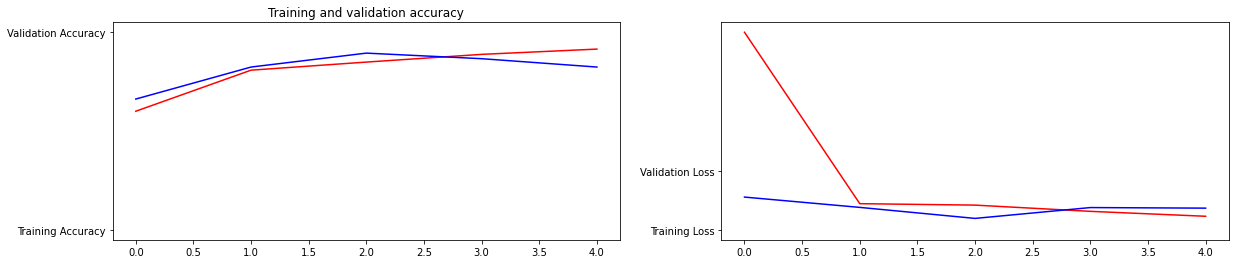

In [12]:
history = create_model(filter_1=16, filter_2=32)
visualize_results(history)

Epoch 1/5
29/29 [==============================] - 45s 2s/step - loss: 4.1032 - accuracy: 0.5844 - val_loss: 0.6608 - val_accuracy: 0.6127
Epoch 2/5
29/29 [==============================] - 51s 2s/step - loss: 0.9909 - accuracy: 0.7318 - val_loss: 0.3885 - val_accuracy: 0.8732
Epoch 3/5
29/29 [==============================] - 44s 2s/step - loss: 0.6579 - accuracy: 0.8064 - val_loss: 0.2956 - val_accuracy: 0.8732
Epoch 4/5
29/29 [==============================] - 40s 1s/step - loss: 0.2799 - accuracy: 0.8881 - val_loss: 0.2479 - val_accuracy: 0.9085
Epoch 5/5
29/29 [==============================] - 45s 2s/step - loss: 0.4299 - accuracy: 0.8650 - val_loss: 0.2128 - val_accuracy: 0.9225


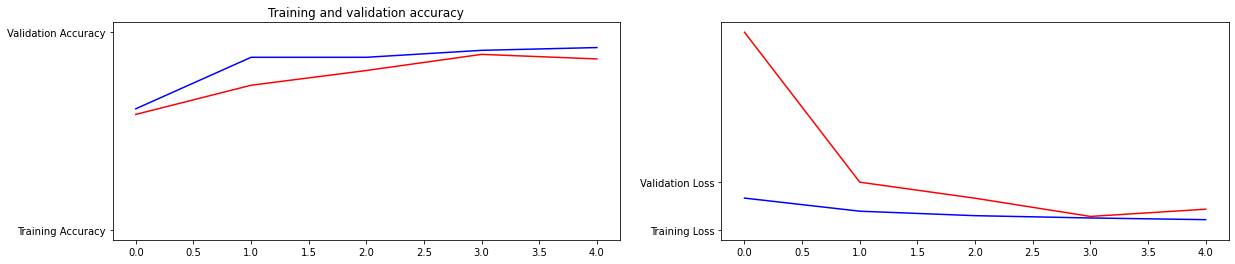

In [13]:
history = create_model(filter_1=16, filter_2=64)
visualize_results(history)

Epoch 1/5
29/29 [==============================] - 112s 4s/step - loss: 3.9616 - accuracy: 0.6252 - val_loss: 0.4000 - val_accuracy: 0.8803
Epoch 2/5
29/29 [==============================] - 110s 4s/step - loss: 0.5800 - accuracy: 0.7549 - val_loss: 0.4524 - val_accuracy: 0.8732
Epoch 3/5
29/29 [==============================] - 108s 4s/step - loss: 0.5765 - accuracy: 0.7940 - val_loss: 0.2823 - val_accuracy: 0.8732
Epoch 4/5
29/29 [==============================] - 112s 4s/step - loss: 0.3850 - accuracy: 0.8774 - val_loss: 0.2731 - val_accuracy: 0.9014
Epoch 5/5
29/29 [==============================] - 112s 4s/step - loss: 0.3112 - accuracy: 0.8686 - val_loss: 0.2289 - val_accuracy: 0.9085


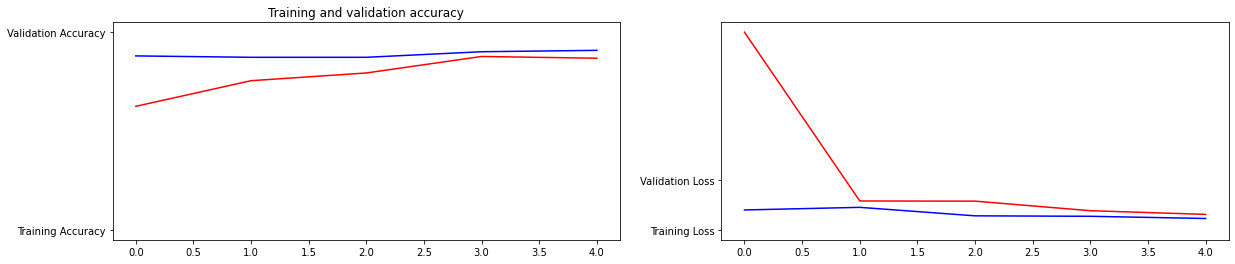

In [14]:
history = create_model(filter_1=64, filter_2=128)
visualize_results(history)

We notice the best results come from the smaller number of filters: **(32, 64)** and **(16, 32)**. Additionally, it takes longer for the (16, 32) network to fit the training data better than the validation data.

#### 3.2.2. Kernel size

Epoch 1/5
29/29 [==============================] - 44s 2s/step - loss: 3.4988 - accuracy: 0.6128 - val_loss: 0.4733 - val_accuracy: 0.7394
Epoch 2/5
29/29 [==============================] - 48s 2s/step - loss: 0.5543 - accuracy: 0.7602 - val_loss: 0.6021 - val_accuracy: 0.6408
Epoch 3/5
29/29 [==============================] - 45s 2s/step - loss: 0.4756 - accuracy: 0.7922 - val_loss: 0.7160 - val_accuracy: 0.7958
Epoch 4/5
29/29 [==============================] - 45s 2s/step - loss: 0.4485 - accuracy: 0.8313 - val_loss: 0.2792 - val_accuracy: 0.8944
Epoch 5/5
29/29 [==============================] - 45s 2s/step - loss: 0.3038 - accuracy: 0.8828 - val_loss: 0.3593 - val_accuracy: 0.8662


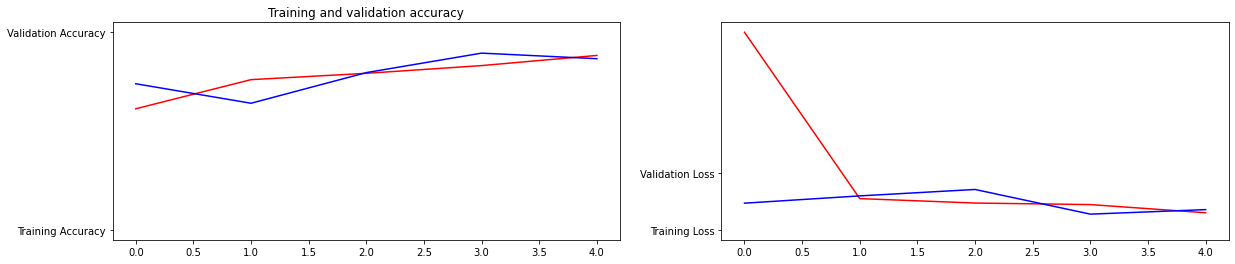

In [15]:
history = create_model(kernel=(2, 2))
visualize_results(history)

Epoch 1/5
29/29 [==============================] - 61s 2s/step - loss: 5.7850 - accuracy: 0.6643 - val_loss: 6.3623 - val_accuracy: 0.4366
Epoch 2/5
29/29 [==============================] - 60s 2s/step - loss: 1.1778 - accuracy: 0.6980 - val_loss: 1.6684 - val_accuracy: 0.6056
Epoch 3/5
29/29 [==============================] - 62s 2s/step - loss: 0.5874 - accuracy: 0.7798 - val_loss: 0.7621 - val_accuracy: 0.6268
Epoch 4/5
29/29 [==============================] - 58s 2s/step - loss: 0.6137 - accuracy: 0.7655 - val_loss: 0.4348 - val_accuracy: 0.8169
Epoch 5/5
29/29 [==============================] - 60s 2s/step - loss: 0.5163 - accuracy: 0.8188 - val_loss: 0.4225 - val_accuracy: 0.8239


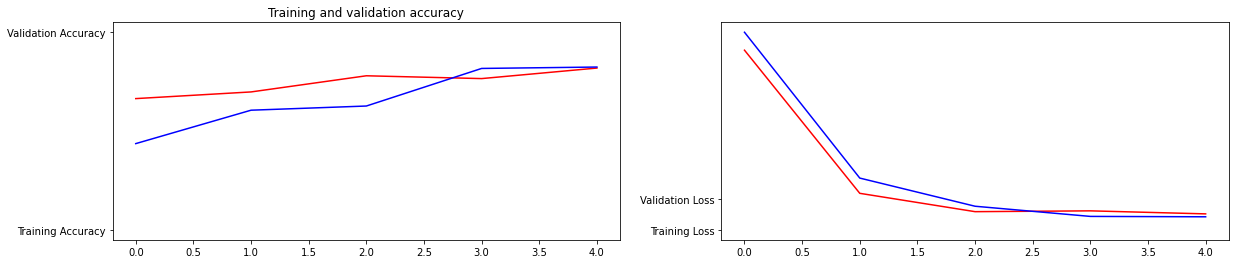

In [16]:
history = create_model(kernel=(4, 4))
visualize_results(history)

Epoch 1/5
29/29 [==============================] - 72s 2s/step - loss: 4.9304 - accuracy: 0.5915 - val_loss: 0.5619 - val_accuracy: 0.7606
Epoch 2/5
29/29 [==============================] - 73s 3s/step - loss: 0.6974 - accuracy: 0.6838 - val_loss: 0.5461 - val_accuracy: 0.7113
Epoch 3/5
29/29 [==============================] - 72s 2s/step - loss: 0.6957 - accuracy: 0.7265 - val_loss: 0.4726 - val_accuracy: 0.8099
Epoch 4/5
29/29 [==============================] - 73s 3s/step - loss: 0.5491 - accuracy: 0.7886 - val_loss: 0.3815 - val_accuracy: 0.8451
Epoch 5/5
29/29 [==============================] - 73s 3s/step - loss: 0.4883 - accuracy: 0.8437 - val_loss: 0.3623 - val_accuracy: 0.8380


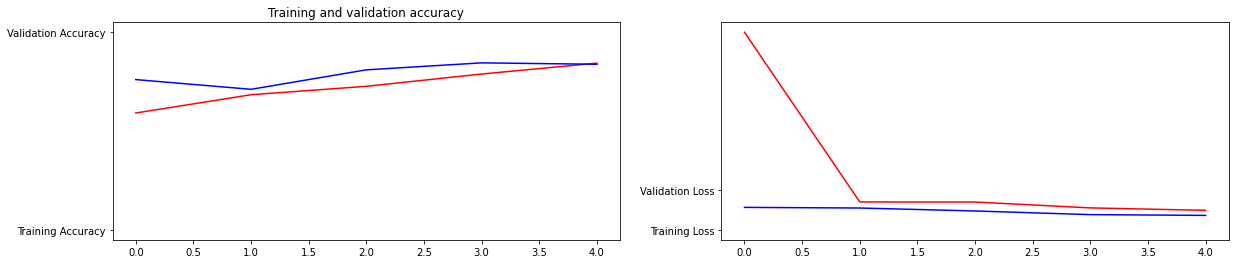

In [17]:
history = create_model(kernel=(5, 5))
visualize_results(history)

The optimal kernel size across the 2 layers is **(3, 3)**.

#### 3.2.3. Activation function (convolutional layer)

### 3.3. Model evaluation

We'll evaluate the final neural network on the Kaggle dataset.